# Scikit learn

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./iris2.csv')
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,wide petal,petal area
0,5.1,3.5,1.4,0.2,SET,0,0.28
1,4.9,3.0,1.4,0.2,SET,0,0.28
2,4.7,3.2,1.3,0.2,SET,0,0.26
3,4.6,3.1,1.5,0.2,SET,0,0.30
4,5.0,3.6,1.4,0.2,SET,0,0.28


In [4]:
y = df['sepal length (cm)'][:50]
x = df['sepal width (cm)'][:50]

clf = RandomForestClassifier(max_depth = 5, n_estimators = 10)

In [5]:
type(x)

pandas.core.series.Series

In [6]:
# clf = RandomForestClassifier(max_depth = 5, n_estimators = 10)
X = df.iloc[:, :4]
y = df.iloc[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [7]:
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis = 0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key = lambda x: x[0], reverse = True)

imps = [x[0] for x in zzs]

([<matplotlib.axis.XTick at 0x1a70210c850>,
 [Text(0, 0, 'petal width (cm)'),
  Text(1, 0, 'petal length (cm)'),
  Text(2, 0, 'sepal length (cm)'),
  Text(3, 0, 'sepal width (cm)')])

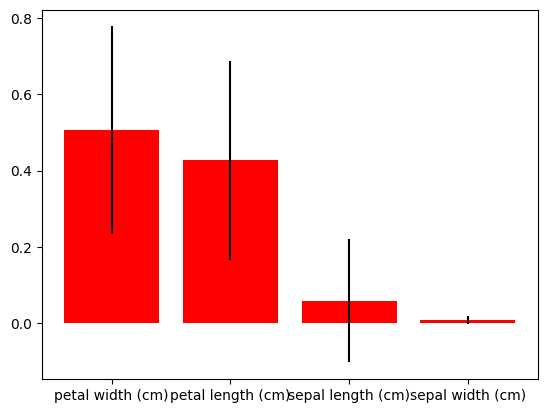

In [8]:
from matplotlib import pyplot as plt


labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

plt.bar(range(len(f_importances)), imps, color = 'r', yerr = errs, align = 'center')
plt.xticks(range(len(f_importances)), labels)

### SVM

In [9]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

In [10]:
clf2 = OneVsOneClassifier(SVC(kernel = 'linear'))
X = df.iloc[:, :4]
y = np.array(df.iloc[:, 4]).astype(str)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)

1.0

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve


In [13]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

# train_score, val_score = validation_curve(model, X_train, y_train, 'n_neighbors', k, cv=5)
# cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv = 5).mean()

In [14]:

y_pred = clf2.predict(X_test)

## App to find underpriced Apartments

In [15]:
import requests

Sourcing Apartment listing data

In [16]:
r = requests.get('https://www.renthop.com/nyc/apartments-for-rent')
r.content

b'<!doctype html>\n<html lang="en">\n<head>\n<title>Apartments for Rent Near Me, Find Nearby Rentals | RentHop</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta http-equiv="Content-Language" content="en" />\n<meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=yes">\n<meta name="description" content="See all apartments for rent nearby. Use our filters to search by location, amenities, price, or quality. Find you perfect home on RentHop." />\n<meta name="author" content="RentHop" />\n<meta name="Copyright" content="Copyright (c) 2009 - 2023 RentHop.com" />\n<meta property="fb:page_id" content="124300320712" />\n<meta property="fb:app_id" content="294321126236" />\n<meta name="og:image" content="https://www.renthop.com/images/renthop_icon_small.png" />\n<link rel="image_src" href="https://www.renthop.com/images/renthop_icon_small.png" />\n<meta name="og:title" content="Apartments for Rent Near Me, Find Nearby Rentals | Rent

In [17]:
from bs4 import BeautifulSoup



In [27]:
soup = BeautifulSoup(r.content, "html5lib")
listing_divs = soup.select('div[class=search-info]')
listing_divs

[]

In [19]:
len(listing_divs)

0